In [1]:
import tensorflow
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D,Activation,MaxPooling2D,Dense,Flatten,Dropout
from keras import backend as k
import numpy as np
import os

Using TensorFlow backend.


In [6]:
#Glob This method creates a Python generator object which can be used to list files under a given directory
import cv2
import glob

path='C:/Users/sindh/OneDrive/Desktop/Mens/training/casuals/*.*'

for i,img in enumerate (glob.glob(path)):
    image=cv2.imread(img)
    #Sharpening
    kernal_Sharpening=np.array([[-1,-1,-1],
                       [-1,10,-1],
                       [-1,-1,-1]])
    sharpened=cv2.filter2D(image,-1,kernal_Sharpening)
    cv2.imwrite('C:/Users/sindh/OneDrive/Desktop/Mens/modified/sharpen{0}.jpg'.format(i),sharpened)
    #Rotation
    height,width=image.shape[:2]
    q_h,q_w=height/2,width/2
    R=cv2.getRotationMatrix2D((q_w,q_h),30,.75)
    rotated=cv2.warpAffine(image,R,(width,height))
    cv2.imwrite('C:/Users/sindh/OneDrive/Desktop/Mens/modified/rotate{0}.jpg'.format(i),rotated)
    #Flipped
    flipped=cv2.flip(image,0)
    cv2.imwrite('C:/Users/sindh/OneDrive/Desktop/Mens/modified/flip{0}.jpg'.format(i),flipped)
    #Bhrightness adjust
    M=np.ones(image.shape,dtype='uint8')*55
    added=cv2.add(image,M)
    cv2.imwrite('C:/Users/sindh/OneDrive/Desktop/Mens/modified/add{0}.jpg'.format(i),added)

    subtract=cv2.subtract(image,M)
    cv2.imwrite('C:/Users/sindh/OneDrive/Desktop/Mens/modified/sub{0}.jpg'.format(i),subtract)
    
    k=cv2.waitKey()
    cv2.destroyAllWindows()


In [7]:

path='C:/Users/sindh/OneDrive/Desktop/Mens/training/tshirts/*.*'

for i,img in enumerate (glob.glob(path)):
    image=cv2.imread(img)
    #Sharpening
    kernal_Sharpening=np.array([[-1,-1,-1],
                       [-1,10,-1],
                       [-1,-1,-1]])
    sharpened=cv2.filter2D(image,-1,kernal_Sharpening)
    cv2.imwrite('C:/Users/sindh/OneDrive/Desktop/Mens/modif/sharpened{0}.jpg'.format(i),sharpened)
    #Rotation
    height,width=image.shape[:2]
    q_h,q_w=height/2,width/2
    R=cv2.getRotationMatrix2D((q_w,q_h),30,.75)
    rotated=cv2.warpAffine(image,R,(width,height))
    cv2.imwrite('C:/Users/sindh/OneDrive/Desktop/Mens/modif/rotate{0}.jpg'.format(i),rotated)

    #Flipped
    flipped=cv2.flip(image,0)
    cv2.imwrite('C:/Users/sindh/OneDrive/Desktop/Mens/modif/flipped{0}.jpg'.format(i),flipped)
    #Bhrightness adjust
    M=np.ones(image.shape,dtype='uint8')*55
    added=cv2.add(image,M)
    cv2.imwrite('C:/Users/sindh/OneDrive/Desktop/Mens/modif/added{0}.jpg'.format(i),added)

    subtract=cv2.subtract(image,M)
    cv2.imwrite('C:/Users/sindh/OneDrive/Desktop/Mens/modif/subtract{0}.jpg'.format(i),subtract)
  
    k=cv2.waitKey()
    cv2.destroyAllWindows()


In [2]:
img_w,img_h=256,256
train='C:/Users/sindh/OneDrive/Desktop/Mens/training'
test='C:/Users/sindh/OneDrive/Desktop/Mens/testing'

batch_size=100
epochs=10


if k.image_data_format()=='channels_first':
    input_shape=(3,img_w,img_h)
else:
    input_shape=(img_w,img_h,3)

model=Sequential()


model.add(Conv2D(32,(3,3),input_shape=input_shape))          
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3)))          
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3)))          
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Activation('relu'))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='RMSprop',
              metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 254, 254, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
activation_2 (Activation)    (None, 125, 125, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 123, 123, 64)     

In [3]:
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator
train_gen=ImageDataGenerator(rescale=1./255,shear_range=0.2,
                            zoom_range=0.2
                            ,horizontal_flip=True)
test_gen=ImageDataGenerator(rescale=1./255)

train_generator=train_gen.flow_from_directory(train,
                                             batch_size=15
                                             ,class_mode='binary')
test_generator=test_gen.flow_from_directory(test,
                                             batch_size=15
                                             ,class_mode='binary')

Found 644 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [4]:
hist=model.fit_generator(train_generator,
                    epochs=10,validation_data=test_generator,
                   )

model.save_weights('Men_shirts.h5')

Epoch 1/10
43/43 [==============================] - 66s 2s/step - loss: 1.4873 - accuracy: 0.5248 - val_loss: 0.6568 - val_accuracy: 0.5167
Epoch 2/10
43/43 [==============================] - 68s 2s/step - loss: 0.6765 - accuracy: 0.5761 - val_loss: 0.6075 - val_accuracy: 0.5667
Epoch 3/10
43/43 [==============================] - 68s 2s/step - loss: 0.8205 - accuracy: 0.6180 - val_loss: 0.6237 - val_accuracy: 0.5667
Epoch 4/10
43/43 [==============================] - 68s 2s/step - loss: 0.5975 - accuracy: 0.7034 - val_loss: 1.0278 - val_accuracy: 0.6167
Epoch 5/10
43/43 [==============================] - 68s 2s/step - loss: 0.5781 - accuracy: 0.7314 - val_loss: 0.5697 - val_accuracy: 0.6500
Epoch 6/10
43/43 [==============================] - 69s 2s/step - loss: 0.5185 - accuracy: 0.7795 - val_loss: 1.5076 - val_accuracy: 0.6667
Epoch 7/10
43/43 [==============================] - 68s 2s/step - loss: 0.5044 - accuracy: 0.7873 - val_loss: 1.0131 - val_accuracy: 0.6500
Epoch 8/10
43/43 [==

C:\Users\sindh\.conda\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sindh\.conda\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


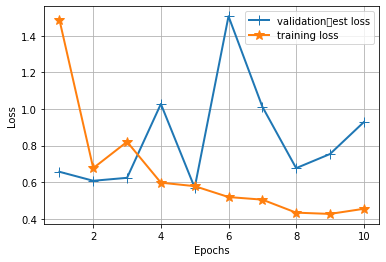

In [5]:
import matplotlib.pyplot as plt
hist_m=hist.history

loss_values=hist_m['loss']
val_loss_values=hist_m['val_loss']
epochs=range(1,len(loss_values)+1)

line1=plt.plot(epochs,val_loss_values,label='validation\test loss')
line2=plt.plot(epochs,loss_values,label='training loss')
plt.setp(line1,linewidth=2.0,marker='+',markersize=10)
plt.setp(line2,linewidth=2.0,marker='*',markersize=10)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

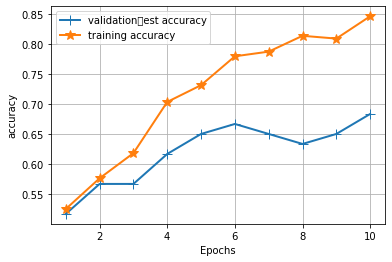

In [6]:
hist_m=hist.history

acc_values=hist_m['accuracy']
val_acc_values=hist_m['val_accuracy']
epochs=range(1,len(acc_values)+1)

line1=plt.plot(epochs,val_acc_values,label='validation\test accuracy')
line2=plt.plot(epochs,acc_values,label='training accuracy')
plt.setp(line1,linewidth=2.0,marker='+',markersize=10)
plt.setp(line2,linewidth=2.0,marker='*',markersize=10)
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.grid(True)
plt.legend()
plt.show()